# Laboratorio 4 - BI

 ### Para este laboratorio nos vamos a basar en el modelo de regresión lineal del laboratorio 3 para realizar un pipeline del modelo y así ofrecer un modelo automatizado con una api. A continuación se va a replicar el laboratorio 3 hasta el literal 6 donde se realiza la construcción del pipeline.

Parte del laboratorio 3: se plantea resolver el problema siguiendo los siguientes pasos a lo largo de este Notebook:

* Entendimiento de los datos y Preparación de datos.
* Identificación de variables a utilizar
* Modelamiento.
* Evaluación cuantitativa
* Evaluación cualitativa
* Exportar el modelo


En el perfilamiento de datos, se desea saber cuántos datos se tienen por filas y columnas, los tipos de datos, la integridad de los datos, su distribución, etc.

En orden de este proceso, inicialmente se procede a importar las librerías a usar durante al análisis y posteriormente el perfilamiento de los datos.

Se escoge un modelo de regresión lineal, ya que en los datos se nos ofrece una variable Objetivo "life expectancy". numérica, la cuál se desea predecir, por lo tanto, un modelo como el nombrado anteriormente es ideal para esta propuesta.

## Entendimiento del negocio

La Clínica de los Alpes desea conocer cuales son los principales factores de muerte que disminuyen la expectativa de vida de los ciudadanos de su país para realizar campañas de concientización con el fin de mejorar la calidad de vida de los ciudadanos.
La Clínica cuenta con un conjunto de datos sobre las expectativas de vida a lo largo de los años en los Alpes y países cercanos, junto con algunos indicadores que miden la salud de una persona, como lo puede ser el índice de masa corporal, la incidencia de varias enfermedades y algunos factores socioculturales como el consumo de alcohol o tabaco.


### 0. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# 1. Entendimiento de los datos y preparación de los datos

Se nos entregó un archivo con varias columnas numéricas, rangos muy distintos y una columna sin nombre, a partir de estos datos se nos solicitó predecir la expectativa de vida (Life expectancy) y a continuación se mostrará el análisis de calidad de los datos: 

### Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8')

In [3]:
#data.to_json(r'Lab4Datos.json', orient='records')

In [4]:
# Cantidad de datos y número de variables
data.shape

(2644, 20)

In [5]:
#Muestra las casillas con nulos de cada columna
data.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
# Eliminación de los datos que no se consideran útiles para el análisis de los datos
data = data.drop(['Unnamed: 0'], axis=1)
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# Se eliminan las filas con nulos y los duplicados
data = data.dropna()
data = data.drop_duplicates()

In [8]:
#Verificamos el tipo de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2644 non-null   float64
 1   Adult Mortality                  2644 non-null   float64
 2   infant deaths                    2644 non-null   int64  
 3   Alcohol                          2644 non-null   float64
 4   percentage expenditure           2644 non-null   float64
 5   Hepatitis B                      2644 non-null   float64
 6   Measles                          2644 non-null   int64  
 7   BMI                              2644 non-null   float64
 8   under-five deaths                2644 non-null   int64  
 9   Polio                            2644 non-null   float64
 10  Total expenditure                2644 non-null   float64
 11  Diphtheria                       2644 non-null   float64
 12  HIV/AIDS            

In [9]:
#Aquí se revisó cada una de las variables para encontrar valores extraños y quitarlos más adelante
data['Population'].value_counts()

0.0         540
444.0         4
127445.0      2
1141.0        2
292.0         2
           ... 
814218.0      1
815691.0      1
816628.0      1
818354.0      1
11689.0       1
Name: Population, Length: 2098, dtype: int64

In [10]:
#Measles fue de las columnas más sospechosas ya que su media da por arriba de 2000 cuando no puede pasar de 1000 habitantes
data['Measles'].value_counts()

0       899
1        98
2        66
3        41
4        30
       ... 
1356      1
6847      1
216       1
2464      1
3578      1
Name: Measles, Length: 859, dtype: int64

In [11]:
#Ahora basándonos en datos lógicos pondremos los límites para diferentes variables tales como:
#No pueden morir 0 adultos y no pueden morir más de 1000 de solo 1000
data = data[data['Adult Mortality'].between(1,1000)]
#No pueden morir más de 1000 de solo 1000
data = data[data['infant deaths'].between(0,1000)]
#No pueden haber más de mil personas
data = data[data['Measles'].between(0,1000)]
#data = data.drop(['Measles'], axis=1)
#No existen personas con un BMI inferior a 5 ni superior a 70
data = data[data['BMI'].between(5,70)]
#No pueden morir más de 1000 niños en un máximo de 1000 personas
data = data[data['under-five deaths'].between(0,1000)]
#No es posible un GDP de 0
data = data[data['GDP'].between(1,2000000)]
#No es posible un país con población de 0
data = data[data['Population'].between(1,2000000000000)]

In [12]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1.582000e+03,1582.000000,1582.000000,1582.000000,1582.000000
mean,70.612895,156.886220,10.640961,5.002832,1071.425874,64.793932,94.034766,41.102149,15.000000,84.096713,5.903369,84.338180,1.780721,8219.295555,7.031254e+06,4.097092,4.133881,0.656290,12.562200
std,9.494451,122.146239,26.981874,4.239616,2490.816947,39.841232,194.893622,18.288298,39.475563,22.857425,2.778640,22.723346,5.582706,15250.303796,1.851775e+07,3.837571,3.916162,0.204719,3.277007
min,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.100000,5.668726,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,64.900000,68.000000,0.000000,0.680000,29.030758,9.000000,0.000000,23.300000,0.000000,83.000000,4.340000,84.000000,0.100000,521.855232,1.775390e+05,1.300000,1.300000,0.533500,10.600000
50%,73.000000,134.000000,2.000000,4.435000,160.057734,87.000000,4.000000,47.550000,2.000000,93.000000,6.150000,93.000000,0.100000,2286.031700,1.134978e+06,2.300000,2.400000,0.700000,12.800000
75%,77.300000,219.000000,10.000000,8.137500,669.808138,95.000000,70.000000,56.700000,12.000000,97.000000,7.930000,97.000000,0.700000,6766.560844,5.731820e+06,6.500000,6.500000,0.808750,15.100000
max,89.000000,699.000000,549.000000,17.870000,19479.911610,99.000000,999.000000,69.700000,879.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.986867e+08,19.700000,19.900000,0.948000,20.700000


In [13]:
#Después de esto verificamos que todos los valores fueran numéricos
for i in data.columns:    
    data = data[pd.to_numeric(data[i], errors='coerce').notnull()]

In [14]:
#Todas las columnas se vuelven numéricas
for col in data.columns:
    data[col] = data[col].astype('float64')
#Verificamos el tipo de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 1 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  1582 non-null   float64
 1   Adult Mortality                  1582 non-null   float64
 2   infant deaths                    1582 non-null   float64
 3   Alcohol                          1582 non-null   float64
 4   percentage expenditure           1582 non-null   float64
 5   Hepatitis B                      1582 non-null   float64
 6   Measles                          1582 non-null   float64
 7   BMI                              1582 non-null   float64
 8   under-five deaths                1582 non-null   float64
 9   Polio                            1582 non-null   float64
 10  Total expenditure                1582 non-null   float64
 11  Diphtheria                       1582 non-null   float64
 12  HIV/AIDS            

In [15]:
data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,57.0,293.0,87.0,0.02,15.296066,67.0,466.0,13.8,120.0,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,56.7,295.0,87.0,0.01,11.089053,65.0,798.0,13.4,122.0,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,77.8,74.0,0.0,4.60,364.975229,99.0,0.0,58.0,0.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2


# 2. Identificación de variables a utilizar
### Exploración y descripción de los datos
Ya con los datos preparados identificamos la variable objetivo "Life expectancy" y al correr un primer intento de modelo quitamos las variables que no representan de forma lineal a la variable (Esto se hace al final de esta sección)

In [16]:
#Se cuentan los valores de la variable target
data["Life expectancy"].value_counts()

73.0    31
75.0    21
81.0    20
78.0    19
73.6    17
        ..
58.5     1
52.7     1
53.5     1
55.4     1
54.9     1
Name: Life expectancy, Length: 334, dtype: int64

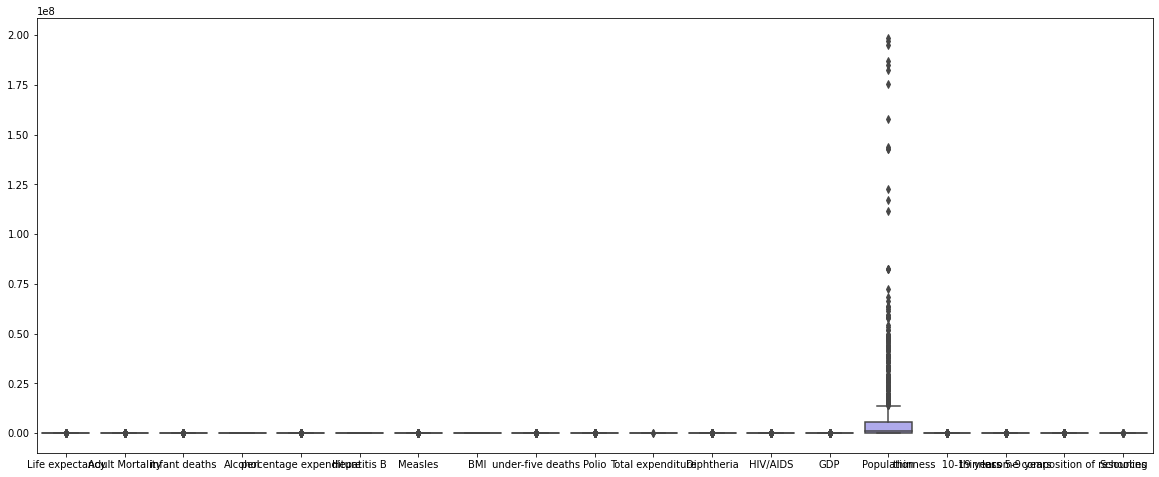

In [17]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=data, orient="v")

In [18]:
#Se decidió no realizar este paso ya que deja una interpretación perfecta por parte del modelo de regresión lineal por lo que es sospechoso y se prefiere quitar
#Normalizamos los datos ya que estos tienen rangos y escalas muy distintas, así podemos mejorar el modelo
#d = preprocessing.normalize(data)
#data_norm = pd.DataFrame(d, columns=data.columns)
#data=data_norm

<AxesSubplot:>

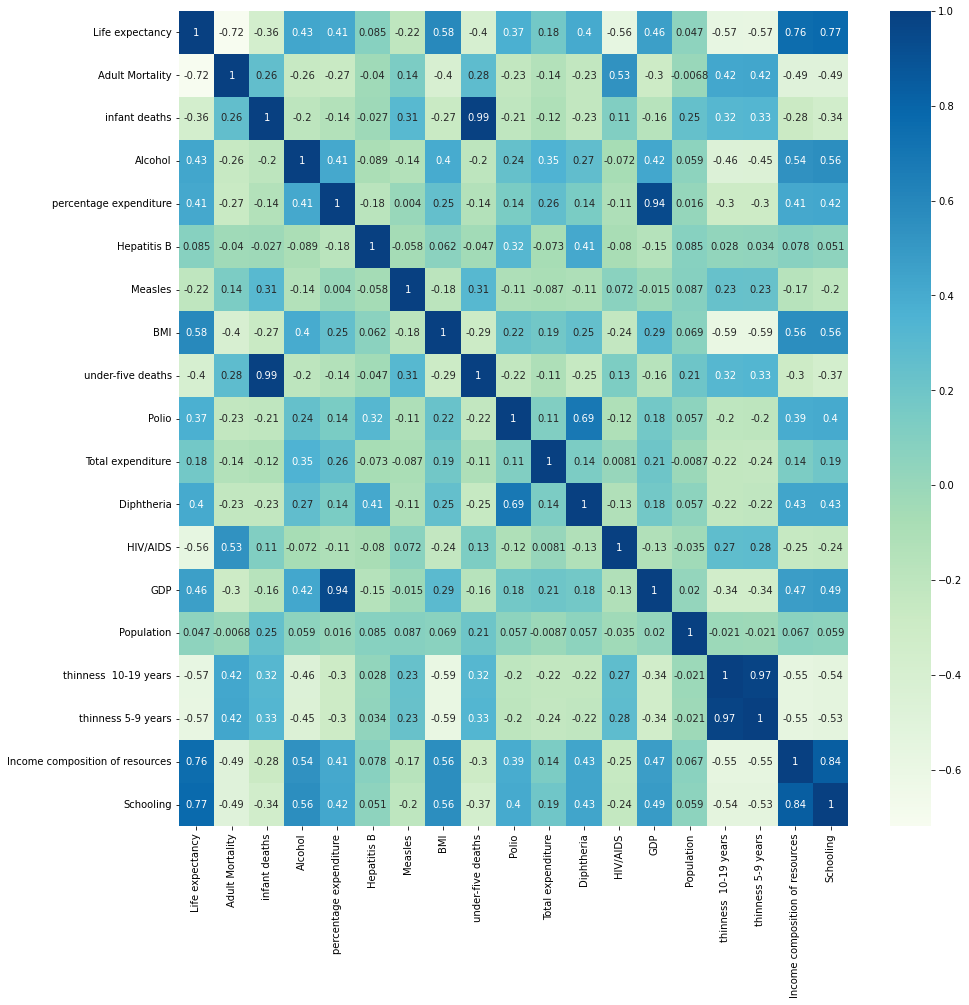

In [19]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

## Este paso no se decide hacer ya que baja el R2 del modelo
Después de realizar un primero modelo se obtuvo que las siguientes variables no son importantes para el modelo de regresión ya que el P-value>Significancia (5%):
- infant deaths	P-value:0.937
- percentage expenditure	P-value:0.166
- under-five deaths	P-value:0.237	
- Population	P-value:0.473

In [20]:
# Esas variables se retiran del modelo:
#data = data.drop(['infant deaths','percentage expenditure','under-five deaths','Population'], axis=1)

# 3. Construcción del modelo
Después de limpiar y discriminar los datos, se procede a crear la regresión Lineal con la variable objetivo ya planteada

In [21]:
# Se selecciona la variable objetivo, en este caso "Life expectancy".
Y = data['Life expectancy']
# Del conjunto de datos se elimina la variable "PermaneceEnEmpresa"
X = data.drop(['Life expectancy'], axis=1)

In [22]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [23]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

# 4. Evaluación del modelo (cuantitativa y cualitativa)
Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [24]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred_train = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred_train, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred_train))
print('R²: %.2f' % r2_score(Y_train, y_pred_train))

MSE: 3.78
MAE: 2.83
R²: 0.84


In [25]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_test = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred_test, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred_test))
print('R²: %.2f' % r2_score(Y_test, y_pred_test))

MSE: 4.06
MAE: 2.93
R²: 0.84


In [26]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [27]:
#Averiguamos la importancia de las variables dentro del modelo
importancia = modelo_regresion.coef_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,9.533515e+00
1,Schooling,7.518419e-01
2,infant deaths,1.476915e-01
3,Total expenditure,6.506027e-02
4,BMI,4.314334e-02
5,Diphtheria,1.499540e-02
6,Polio,7.565964e-03
7,Hepatitis B,2.229655e-04
8,percentage expenditure,1.211376e-04
9,GDP,3.657851e-05


### 5. Interpretación del modelo
Otro aspecto que debemos tener en cuenta es la significancia estadística de los coeficientes. Para determinarla, se aplica la prueba t de Student o t-test, con las siguientes hipótesis sobre los coeficientes:

H0: wi = 0, es decir, no hay una relación lineal entre la variable dependiente y la independiente.

Ha: wi ≠ 0, es decir, sí existe una relación lineal entre ambas variables.

El p-valor (en inglés p-value) del coeficiente verifica entonces la hipótesis nula de la siguiente forma:
Si el p-valor es menor o igual que el nivel de significancia seleccionado, entonces se puede afirmar que los datos suministran suficiente evidencia para rechazar la hipótesis nula. Es decir, cambios en la variable independiente estarán asociados con cambios en la variable dependiente y esta relación es estadísticamente significativa, por lo que la variable independiente será importante para el modelo de regresión.
Si el p-valor es mayor que el nivel de significancia, entonces no hay suficiente evidencia en los datos para rechazar la hipótesis nula y concluir que w1 es significativamente diferente de 0.

Por otra parte, el valor de un coeficiente determina cuánto aumenta o se reduce el valor promedio de la variable dependiente cuando la independiente cambia por una unidad. El signo del coeficiente indica si la relación es positiva o negativa.


Podemos sacar un reporte que nos va a permitir analizar estadísticos del modelo.

In [28]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit()
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6683.
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        20:12:07   Log-Likelihood:                         -5548.5
No. Observations:                1582   AIC:                                  1.113e+04
Df Residuals:                    1564   BIC:                                  1.123e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mortality                     0.0128      0.002      6.155      0.000       0.009       0.017
infant deaths                      -0.0753      0.057     -1.317      0.188      -0.187       0.037
Alcohol                            -0.4749      0.064     -7.410      0.000      -0.601      -0.349
percentage expenditure              0.0003      0.000      1.255      0.209      -0.000       0.001
Hepatitis B                        -0.0009      0.006     -0.151      0.880      -0.013       0.011
Measles                             0.0020      0.001      1.791      0.073      -0.000       0.004
BMI                                 0.1827      0.015     12.527      0.000       0.154       0.211
under-five deaths                   0.0713      0.039      1.832      0.067      -0.005       0.148
Polio                               0.0793      0.012      6.397      0.000       0.055       0.104
Total expenditure                   0.9307      0.078     11.880      0.000       0.777       1.084
Diphtheria                          0.0688      0.014      5.080      0.000       0.042       0.095
HIV/AIDS                           -0.5963      0.044    -13.659      0.000      -0.682      -0.511
GDP                             -7.671e-05   4.33e-05     -1.773      0.076      -0.000    8.15e-06
Population                      -1.759e-08    1.2e-08     -1.470      0.142   -4.11e-08    5.88e-09
thinness  10-19 years               0.4672      0.235      1.991      0.047       0.007       0.927
thinness 5-9 years                  0.5302      0.232      2.289      0.022       0.076       0.985
Income composition of resources    18.6504      1.958      9.525      0.000      14.810      22.491
Schooling                           2.3328      0.118     19.827      0.000       2.102       2.564
==============================================================================
Omnibus:                      374.238   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1625.282
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       7.486   Cond. No.                     1.90e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusiones
Luego de ejecutar el modelo, se pueden realizar diferentes pruebas de hipotesis sobre el mismo. Para este caso, se decidieron ejecutar pruebas T para analizar cada una de las variables de manera independiente con respecto a nuestra variable objetivo. Teniendo el p-Value de cada una de las variables y el resultado de nuestra prueba T, podemos definir que las variables que tienen más influencia en la expectativa de vida de una persona son el consumo de Alcohol el indice de BMI, Polio,Diphtheria y HIV/AIDS.

# 6. Almacenamiento  del modelo y pipeline del lab 4.
Puedes guardar tu modelo para que lo puedas recuperar cuando lo desees o llevarlo a producción. Para esto vamos a realizar un pipeline que normalice los datos y guarde el modelo para su posterior uso:

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import joblib

#Como el modelo ya lo habíamos ajustado a los datos del laboratorio 3 entonces no es necesario hacerlo de nuevo, lo que se realizará nuevo 
#va a ser la estandarización de los datos para mejorar la precisión del modelo

#En este paso estandarizamos los datos y también reemplazamos los valores nulos por la media de su respectiva columna
pipe= Pipeline(steps=[('standardscaler', StandardScaler()),
                ('impute', SimpleImputer(strategy='mean'))])
#Verificamos que todas las columnas queden como numéricas
full_processor = ColumnTransformer(transformers=[
    ('number', pipe, X_train.columns)
])
full_processor.fit_transform(X_train)
#Se realiza el pipeline definitivo para exportar al proyecto
pipelineFinal = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', modelo_regresion)
])
pipelineFinal.fit(X_train,Y_train)
# Guardar nuestra canalización en un archivo pickle binario 
joblib.dump(pipelineFinal, 'assets/modelo.pkl')

['assets/modelo.pkl']

In [30]:
# Una forma de guardar el modelo es a través de la funcionalidad joblib.
#import joblib
# Ahora guardamos el modelo con el nombre que selecciones.
#joblib.dump(modelo_regresion, 'assets/modelo.joblib')
# Si lo quieres recuperar más tarde puedes utilizar la siguiente instrucción:
# modelo = load('ModeloRegresion.joblib') 